# Data cleaning

<u>**Overview**</u>

The data has been split into two groups:
training set (train.csv)
test set (test.csv)

|Variable |	Definition |	Key|
|---------|------------|-------|
|survival |	Survival	|0 = No, 1 = Yes|
|pclass	  | Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	  | Sex	|
|Age	  | Age in years	|
|sibsp	  | # of siblings / spouses aboard the Titanic	|
|parch	  | # of parents / children aboard the Titanic	|
|ticket	  | Ticket number	|
|fare	  | Passenger fare	|
|cabin	  | Cabin number	|
|embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton|

<u>**Variable Notes**</u>

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Imports
import numpy as np 
import pandas as pd 

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Reading data
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
# printing the first rows
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Turning the column names to lowercase
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [ ]:
# splitting features and target variable and getting rid of useless columns
y_train = train['survived']
x_train = train.drop(['passengerid','survived','name','ticket','cabin'],axis=1)
x_test = test.drop(['passengerid','name','ticket','cabin'],axis=1)

In [6]:
# printing first couple of rows again
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
x_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [8]:
# inspecting the non null values count and dtype of each columnv of the train dataset
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [9]:
# inspecting the non null values count and dtype of each columnv of the test dataset
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   sex       418 non-null    object 
 2   age       332 non-null    float64
 3   sibsp     418 non-null    int64  
 4   parch     418 non-null    int64  
 5   fare      417 non-null    float64
 6   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [10]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
# calculating the number of null values of both datasets
x_train.isna().sum(), x_test.isna().sum()

(pclass        0
 sex           0
 age         177
 sibsp         0
 parch         0
 fare          0
 embarked      2
 dtype: int64,
 pclass       0
 sex          0
 age         86
 sibsp        0
 parch        0
 fare         1
 embarked     0
 dtype: int64)

In [12]:
# printing the number of unique values in each column
x_train.nunique()

pclass        3
sex           2
age          88
sibsp         7
parch         7
fare        248
embarked      3
dtype: int64

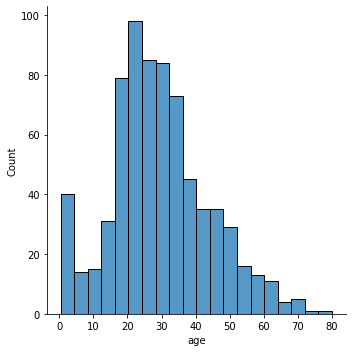

In [13]:
# plotting the age distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=x_train,x='age')
plt.show()

In [14]:
# decided to replace the null values with the median to keep all ages as integers

x_train['age'] = x_train['age'].fillna(x_train['age'].median())
x_test['age'] = x_test['age'].fillna(x_test['age'].median())

In [15]:
# pivot table to decide what to replace the null values with

x_train.pivot_table(index=['sibsp','parch','sex'],values='age',aggfunc=['mean','median'])

mean median
                          age    age
sibsp parch sex                     
0     0     female  29.706349   28.0
            male    31.625304   28.0
      1     female  27.125000   23.5
            male    33.530000   36.5
      2     female  21.800000   24.0
            male    21.536667   17.0
      3     female  24.000000   24.0
      4     female  29.000000   29.0
      5     female  40.000000   40.0
1     0     female  30.960317   28.0
            male    31.808333   29.0
      1     female  29.115385   31.0
            male    25.435484   20.0
      2     female  21.818182   24.0
            male    20.490000   25.5
      3     female  51.000000   51.0
            male    16.000000   16.0
      4     female  45.000000   45.0
            male    52.000000   52.0
      5     female  38.500000   38.5
            male    39.000000   39.0
      6     female  43.000000   43.0
2     0     female  33.000000   28.0
            male    30.692308   28.0
      1     female   6.900000    4.0
            male    12.000000   12.0
      2     female  17.250000   19.5
      3     female  24.000000   24.0
3     0     female  31.500000   31.5
      1     female  19.000000   28.0
            male    15.000000   15.0
      2     female  14.500000   16.0
            male    11.000000   10.0
4     1     male     6.777778    7.0
      2     female   8.333333    7.5
            male     5.333333    4.0
5     2     female  16.000000   16.0
            male     8.750000   10.0
8     2     female  28.000000   28.0
            male    28.000000   28.0

In [16]:
# checking the number of null values again

x_train.isna().sum(),x_test.isna().sum()

(pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 embarked    2
 dtype: int64,
 pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        1
 embarked    0
 dtype: int64)

In [17]:
# filling the null values with the most common unique value

x_train.embarked.fillna(x_train.embarked.value_counts().index[x_train.embarked.value_counts().argmax()],inplace=True)
x_test.fare.fillna(x_test.fare.value_counts().index[x_test.fare.value_counts().argmax()],inplace=True)

In [18]:
# all null values are gone

x_train.isna().sum(),x_test.isna().sum()

(pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 embarked    0
 dtype: int64,
 pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 embarked    0
 dtype: int64)

In [19]:
x_train.nunique()

pclass        3
sex           2
age          88
sibsp         7
parch         7
fare        248
embarked      3
dtype: int64

In [20]:
# changing the type of the 'pclass' column

x_train['pclass'] = x_train['pclass'].astype(str)
x_test['pclass'] = x_test['pclass'].astype(str)

In [21]:
# tranforming the 'pclass' categorical' column to indicator variables

dummies_test = pd.get_dummies(x_train['pclass'])
x_train = pd.concat([x_train.drop('pclass',axis=1),dummies_test],axis=1)
x_train.head()

,sex,age,sibsp,parch,fare,embarked,1,2,3
0,male,22.0,1,0,7.2500,S,0,0,1
1,female,38.0,1,0,71.2833,C,1,0,0
2,female,26.0,0,0,7.9250,S,0,0,1
3,female,35.0,1,0,53.1000,S,1,0,0
4,male,35.0,0,0,8.0500,S,0,0,1


In [22]:
# same treatment as above

dummies_test = pd.get_dummies(x_test['pclass'])
x_test = pd.concat([x_test.drop('pclass',axis=1),dummies_test],axis=1)
x_test.head()

,sex,age,sibsp,parch,fare,embarked,1,2,3
0,male,34.5,0,0,7.8292,Q,0,0,1
1,female,47.0,1,0,7.0000,S,0,0,1
2,male,62.0,0,0,9.6875,Q,0,1,0
3,male,27.0,0,0,8.6625,S,0,0,1
4,female,22.0,1,1,12.2875,S,0,0,1


In [ ]:
# tranforming the 'sex' categorical' column to indicator variables

dummies_test = pd.get_dummies(x_train['sex'])
x_train = pd.concat([x_train.drop('sex',axis=1),dummies_test],axis=1)
dummies_test = pd.get_dummies(x_test['sex'])
x_test = pd.concat([x_test.drop('sex',axis=1),dummies_test],axis=1)
x_train.head()

In [24]:
# tranforming the 'embarked' categorical' column to indicator variables

dummies_test = pd.get_dummies(x_train['embarked'])
x_train = pd.concat([x_train.drop('embarked',axis=1),dummies_test],axis=1)
dummies_test = pd.get_dummies(x_test['embarked'])
x_test = pd.concat([x_test.drop('embarked',axis=1),dummies_test],axis=1)
x_train.head()

,age,sibsp,parch,fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [25]:
# Normalizing the numerical columns

x_train['age'] = x_train['age'] / x_train['age'].max()
x_train['fare'] = x_train['fare'] / x_train['fare'].max()
x_test['age'] = x_test['age'] / x_test['age'].max()
x_test['fare'] = x_test['fare'] / x_test['fare'].max()

In [26]:
# visualizing the results

x_test

,age,sibsp,parch,fare,1,2,3,female,male,C,Q,S
0,0.453947,0,0,0.015282,0,0,1,0,1,0,1,0
1,0.618421,1,0,0.013663,0,0,1,1,0,0,0,1
2,0.815789,0,0,0.018909,0,1,0,0,1,0,1,0
3,0.355263,0,0,0.016908,0,0,1,0,1,0,0,1
4,0.289474,1,1,0.023984,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.355263,0,0,0.015713,0,0,1,0,1,0,0,1
414,0.513158,0,0,0.212559,1,0,0,1,0,1,0,0
415,0.506579,0,0,0.014151,0,0,1,0,1,0,0,1
416,0.355263,0,0,0.015713,0,0,1,0,1,0,0,1


# Modelling

In [27]:
# initializing the random forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200,n_jobs=-1).fit(x_train,y_train)

In [28]:
# viewing the parameters of the model to perform the grid search

RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
# our model accuracy

model.score(x_train,y_train)

0.9797979797979798

In [30]:
# Tuning the hyperparameters using gridsearch

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

params = {
    'max_depth': np.arange(17,25),
    'n_estimators': np.arange(100,201,10),
}

In [31]:
# fitting

model_b = GridSearchCV(model,params,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] END .....................max_depth=17, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=17, n_estimators=110; total time=   0.4s
[CV] END .....................max_depth=17, n_estimators=110; total time=   0.3s
[CV] END .....................max_depth=17, n_estimators=120; total time=   0.4s
[CV] END .....................max_depth=17, n_estimators=130; total time=   0.4s
[CV] END .....................max_depth=17, n_estimators=140; total time=   0.4s
[CV] END .....................max_depth=17, n_estimators=150; total time=   0.5s
[CV] END .....................max_depth=17, n_estimators=150; total time=   0.5s
[CV] END .....................max_depth=17, n_estimators=160; total time=   0.5s
[CV] END .....................max_depth=17, n_estimators=170; total time=   0.5s
[CV] END .....................max_depth=17, n_estimators=180; total time=   0.6s
[CV] END .....................max_depth=17, n_e

In [32]:
# best performing hyperparameters

model_b.best_params_

{'max_depth': 20, 'n_estimators': 110}

In [33]:
# model accuracy using cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(model,x_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
score

array([0.72222222, 0.82022472, 0.74157303, 0.84269663, 0.87640449,
       0.83146067, 0.82022472, 0.76404494, 0.80898876, 0.85393258])

In [34]:
# extracting the best model

model = model_b.best_estimator_

In [35]:
# predicting the survivors from the test dataset

prediction = model.predict(x_test)
prediction_final = pd.concat([test['passengerid'],pd.DataFrame(prediction)],axis=1)
prediction_final = prediction_final.rename(columns={0:'survived'})
prediction_final

,passengerid,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
